In [1]:
from numpy import array
import time
import os
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import pickle
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier

from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

from joblib import parallel_backend

from joblib import Parallel, delayed


In [2]:
print('loading model >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')

mfilename='/shares/kslotkin_share/private/tratnayake/frNAnet/models/rfc_S16202204_SRUR_wg_v3.pkl'

# load the model from disk
rfc_v1 = pickle.load(open(mfilename, 'rb'))

loading model >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [3]:
print('loading data >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')

comb_df= pd.read_csv('/shares/kslotkin_share/private/tratnayake/frNAnet/SR_UR/prediction/S040720_dinuc_df.txt',header=0,sep='\t')


print('input shape: >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
np.shape(comb_df)


loading data >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
input shape: >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


(1260575, 23)

In [4]:
shuf_comb_df=comb_df.iloc[np.random.permutation(len(comb_df))]

shuf_comb_df=shuf_comb_df.reset_index(drop=True)

shuf_comb_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260575 entries, 0 to 1260574
Data columns (total 23 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   seq_id   1260575 non-null  object 
 1   5p       1260575 non-null  int64  
 2   3p       1260575 non-null  int64  
 3   strand   1260575 non-null  int64  
 4   ptype    1260575 non-null  int64  
 5   length   1260575 non-null  int64  
 6   gc_cont  1260575 non-null  float64
 7   AA       1260575 non-null  int64  
 8   AC       1260575 non-null  int64  
 9   AG       1260575 non-null  int64  
 10  AT       1260575 non-null  int64  
 11  CA       1260575 non-null  int64  
 12  CC       1260575 non-null  int64  
 13  CG       1260575 non-null  int64  
 14  CT       1260575 non-null  int64  
 15  GA       1260575 non-null  int64  
 16  GC       1260575 non-null  int64  
 17  GG       1260575 non-null  int64  
 18  GT       1260575 non-null  int64  
 19  TA       1260575 non-null  int64  
 20  TC

In [6]:
ydt=shuf_comb_df['ptype']
xdt=shuf_comb_df.drop(['seq_id','ptype'],axis=1)


In [7]:
with parallel_backend('threading',n_jobs=48 ):

    print('prediction >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    

    y_pred = rfc_v1.predict(xdt)


prediction >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [8]:

print('prediction accuracy score : {0:0.4f}'. format(accuracy_score(ydt, y_pred)))



print ("\nClassification report :\n",(classification_report(ydt,y_pred)))



prediction accuracy score : 0.5218

Classification report :
               precision    recall  f1-score   support

           0       0.27      0.35      0.30    381785
           1       0.68      0.60      0.64    878790

    accuracy                           0.52   1260575
   macro avg       0.48      0.47      0.47   1260575
weighted avg       0.56      0.52      0.54   1260575



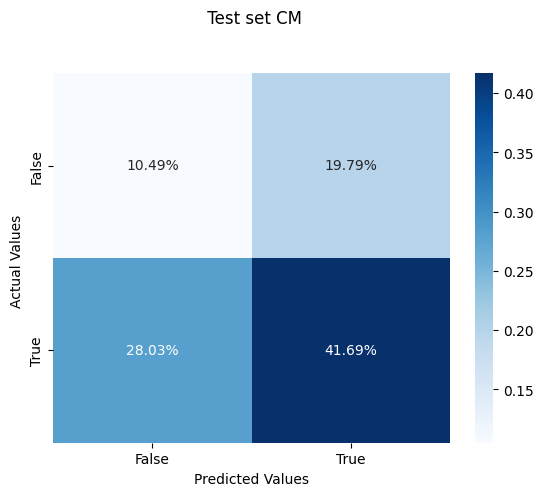

In [9]:
# #####################################  CONFUSION MATRIX for test set   ########################################################################
fig1=plt.figure()
cm = confusion_matrix(y_true=ydt, y_pred=y_pred)

ax = sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

ax.set_title(' Test set CM\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


fig1 = ax.get_figure()

fig1.savefig("RFC_SRURfullred_S040720_v3_pred_v3.pdf")
